線形回帰
====================
--------------------------------------------

線形回帰は連続変数の予測に使用される手法であり、
目的変数yを、重みwと説明変数xを足し合わせた

$y=w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}$

の形で予測を行う。説明のため、以下のように書き換える。

$f(x)=W^T\Phi(x)$

予測するためには、この$W$を推定する必要がある。推定することで予測式を作る(パラメータを求める)のが回帰式のモデリングである。

$W$はM次ベクトルで、説明変数に対する重みである。なお、Mは説明変数の数である（回帰式に定数を含む場合、説明変数の数+1）。

$
  W=\left(
  \begin{array}{ccc}
  w_{1} \\
  w_{2} \\
  \vdots \\
  w_{M}
  \end{array}
  \right)
$

$\Phi$はN×M次元の特長行列で、Nはケース（レコード）の数である。

$
  \Phi=\left(
  \begin{array}{ccc}
  1 & x_{11} & x_{12} & \ldots & x_{1M} \\
  1 & x_{21} & x_{22} & \ldots & x_{1M} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  1 & x_{N1} & x_{N2} & \ldots & x_{NM}
  \end{array}
  \right)
$

$W$は解析的に以下のように求めることができる。

$W=(\Phi^T\Phi)^{-1}\Phi^Tt$

$t$は学習データの目的変数である。

$t=\left(
\begin{array}{ccc}
t_{1} \\
t_{2} \\
\vdots \\
t_{N} \\
\end{array}
\right)
$

このように、重みを学習データの説明変数と学習データの目的変数から推定している事がわかる。

##単回帰

In [3]:
%matplotlib inline
import numpy
import matplotlib.pyplot
import pandas

In [4]:
t = numpy.array([213000,192000,199000,241000,175000,220000,208000,184000,203000,245000,188000,216000,200000,173000,187000,191000,219000,189000,236000,179000])
X1 = numpy.array([8,5,7,13,2,10,4,3,7,12,6,10,6,1,3,3,9,2,11,1])
df = pandas.DataFrame({
        'Salary' : t,
        'Years' : X1
        })
df.ix[ range(0,5), :]

,Salary,Years
0,213000,8
1,192000,5
2,199000,7
3,241000,13
4,175000,2


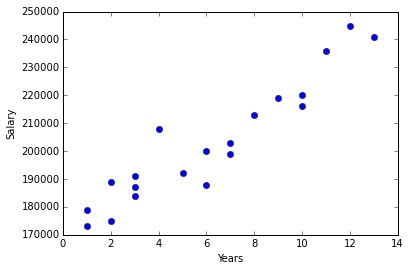

In [8]:
matplotlib.pyplot.plot(X1, t, 'o')
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel('Years')
matplotlib.pyplot.ylabel('Salary')

In [9]:
def phi(x):
    return [1, x]
PHI = numpy.array([phi(x) for x in X1])
PHI

array([[ 1,  8],
       [ 1,  5],
       [ 1,  7],
       [ 1, 13],
       [ 1,  2],
       [ 1, 10],
       [ 1,  4],
       [ 1,  3],
       [ 1,  7],
       [ 1, 12],
       [ 1,  6],
       [ 1, 10],
       [ 1,  6],
       [ 1,  1],
       [ 1,  3],
       [ 1,  3],
       [ 1,  9],
       [ 1,  2],
       [ 1, 11],
       [ 1,  1]])

In [10]:
W = numpy.linalg.solve(numpy.dot(PHI.T, PHI), numpy.dot(PHI.T, t))
W

array([ 170000.73923489,    5349.47329514])

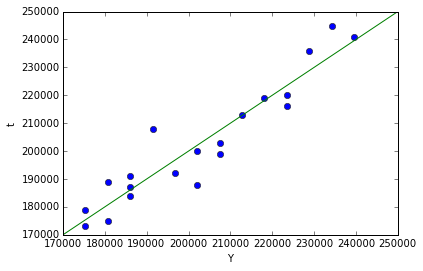

In [11]:
Y = numpy.dot(PHI, W)
xylist = numpy.array([170000, 250000])
matplotlib.pyplot.plot(Y, t, 'o')
matplotlib.pyplot.plot(xylist, xylist)
matplotlib.pyplot.legend()

matplotlib.pyplot.xlabel("Y")
matplotlib.pyplot.ylabel("t")

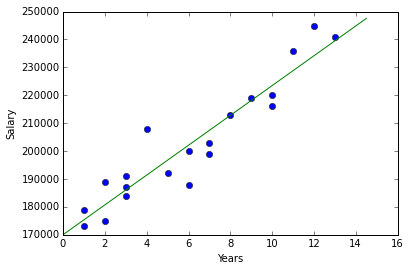

In [12]:
#0～15までのデータに対して、予測を行う
xlist = numpy.arange(0, 15, 0.5)
ylist = [numpy.dot(W, phi(x)) for x in xlist]

matplotlib.pyplot.plot(X1, t, 'o')
matplotlib.pyplot.plot(xlist, ylist)
matplotlib.pyplot.legend()

matplotlib.pyplot.xlabel("Years")
matplotlib.pyplot.ylabel("Salary")

##重回帰

In [13]:
%matplotlib inline
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D
import pandas

In [14]:
t = numpy.array([213000,192000,199000,241000,175000,220000,208000,184000,203000,245000,188000,216000,200000,173000,187000,191000,219000,189000,236000,179000])
X1 = numpy.array([8,5,7,13,2,10,4,3,7,12,6,10,6,1,3,3,9,2,11,1])
X2 = numpy.array([1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1,1])
df = pandas.DataFrame({
        'Salary' : t,
        'Years' : X1,
        'License' : X2
        })
df.ix[ range(0,5), :][["Salary", "Years", "License"]]

,Salary,Years,License
0,213000,8,1
1,192000,5,0
2,199000,7,0
3,241000,13,0
4,175000,2,0


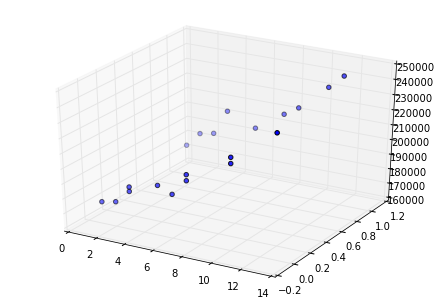

In [15]:
fig = matplotlib.pyplot.figure()
ax = Axes3D(fig)
ax.scatter3D(X1, X2, t)

In [16]:
PHI = numpy.array([numpy.array([1 for x in X1]), X1,X2]).T
PHI

array([[ 1,  8,  1],
       [ 1,  5,  0],
       [ 1,  7,  0],
       [ 1, 13,  0],
       [ 1,  2,  0],
       [ 1, 10,  0],
       [ 1,  4,  1],
       [ 1,  3,  0],
       [ 1,  7,  0],
       [ 1, 12,  1],
       [ 1,  6,  0],
       [ 1, 10,  0],
       [ 1,  6,  1],
       [ 1,  1,  0],
       [ 1,  3,  0],
       [ 1,  3,  1],
       [ 1,  9,  1],
       [ 1,  2,  1],
       [ 1, 11,  1],
       [ 1,  1,  1]])

In [17]:
W = numpy.linalg.solve(numpy.dot(PHI.T, PHI), numpy.dot(PHI.T, t))
W

array([ 165565.9545862 ,    5324.99253062,   10189.64744547])

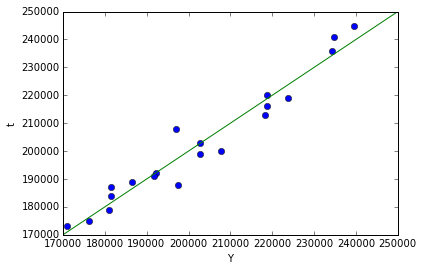

In [18]:
Y = numpy.dot(PHI, W)
xylist = numpy.array([170000, 250000])
matplotlib.pyplot.plot(Y, t, 'o')
matplotlib.pyplot.plot(xylist, xylist)
matplotlib.pyplot.legend()

matplotlib.pyplot.xlabel("Y")
matplotlib.pyplot.ylabel("t")